In [1]:
import pandas as pd
import os
from glob import glob
import json
import re
import numpy as np

In [2]:
# set working directory
#os.chdir('/project/cper_neon_aop/cper_pdog_uas')

# set whether to pull full tiles from external disk
#external_path = None
external_path = '/mnt/d/202109'

idx = 0
for d in glob('./cnn_results_*'):
    f_list = glob(d + '/best_model_*_validation.txt')
    f_list = [f for f in f_list if not 'downscaled' in f and not 'old' in f]
    for f in f_list:
        with open(f, 'r') as src:
            val_dat = src.read()
            df_tmp = pd.DataFrame(json.loads(re.sub('nan', '"nan"', '"'.join(val_dat.split("'")))), index=[0])
            df_tmp['model'] = d.split('_')[-1]
            df_tmp['inputs'] = ','.join(os.path.basename(f).split('_')[2:-1])
            df_tmp['min_rp'] = df_tmp[['precision', 'recall']].min(axis=1)
            if idx == 0:
                df_val = df_tmp
            else:
                df_val = pd.concat([df_val, df_tmp])
            idx += 1

In [3]:
# get number of inputs for each model for plotting
df_val['n_inputs'] = df_val['inputs'].apply(lambda x: len(x.split(',')))

In [4]:
# recompute fscore-beta manually
df_val['fscore_old'] = df_val['fscore']
beta = 1.0
df_val['fscore'] = df_val.apply(lambda x: ((1 + beta) * x['recall'] * x['precision']) / (x['recall'] + beta * x['precision']), axis=1)

In [5]:
# get average scores by inputs
df_val['fscore_avg_inputs'] = df_val.groupby('inputs')['fscore'].transform(lambda x: x.mean())
df_val['min_rp_avg_inputs'] = df_val.groupby('inputs')['min_rp'].transform(lambda x: x.mean())

In [6]:
df_val.sort_values('fscore', ascending=False).head(20)

,mccloss,iou_score,accuracy,precision,recall,fscore,best_epoch,resolution,model,inputs,min_rp,n_inputs,fscore_old,fscore_avg_inputs,min_rp_avg_inputs
0,0.743204,0.877344,0.994782,0.923132,0.944633,0.933759,31,1.5,unetplus,"rgb,tpi,shade,ndvi",0.923132,4,0.915198,0.918278,0.897354
0,0.748230,0.867462,0.994720,0.917714,0.941078,0.929249,23,1.5,deeplabplus,"rgb,tpi",0.917714,2,0.908108,0.917786,0.907641
0,0.764600,0.855961,0.994129,0.919244,0.930099,0.924640,23,1.5,unetplus,"rgb,tpi,shade",0.919244,3,0.895101,0.905736,0.892590
0,0.760396,0.855702,0.994149,0.919041,0.928747,0.923868,26,1.5,deeplabplus,"rgb,tpi,shade,ndvi",0.919041,4,0.895144,0.918278,0.897354
0,0.766357,0.853421,0.994197,0.917851,0.927152,0.922478,17,1.5,deeplabplus,"rgb,tpi,ndvi,dsm",0.917851,4,0.890041,0.918729,0.913781
0,0.725206,0.853343,0.993816,0.912403,0.930673,0.921447,26,1.5,fpn,"rgb,tpi",0.912403,2,0.894427,0.917786,0.907641
0,0.762912,0.848922,0.994263,0.912150,0.927891,0.919953,19,1.5,unetplus,"rgb,tpi,ndvi,dsm",0.912150,4,0.887704,0.918729,0.913781
0,0.786553,0.848082,0.993371,0.902925,0.936662,0.919484,23,1.5,manet,"rgb,tpi,shade,ndvi,dsm",0.902925,5,0.887899,0.911118,0.893267
0,0.785860,0.846256,0.994501,0.914473,0.923823,0.919124,15,1.5,unetplus,"rgb,shade,dsm",0.914473,3,0.882484,0.908842,0.904391
0,0.770291,0.845540,0.994001,0.909179,0.928457,0.918717,25,1.5,unetplus,"rgb,tpi,dsm",0.909179,3,0.884760,0.910120,0.892179


### Plot validation results

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

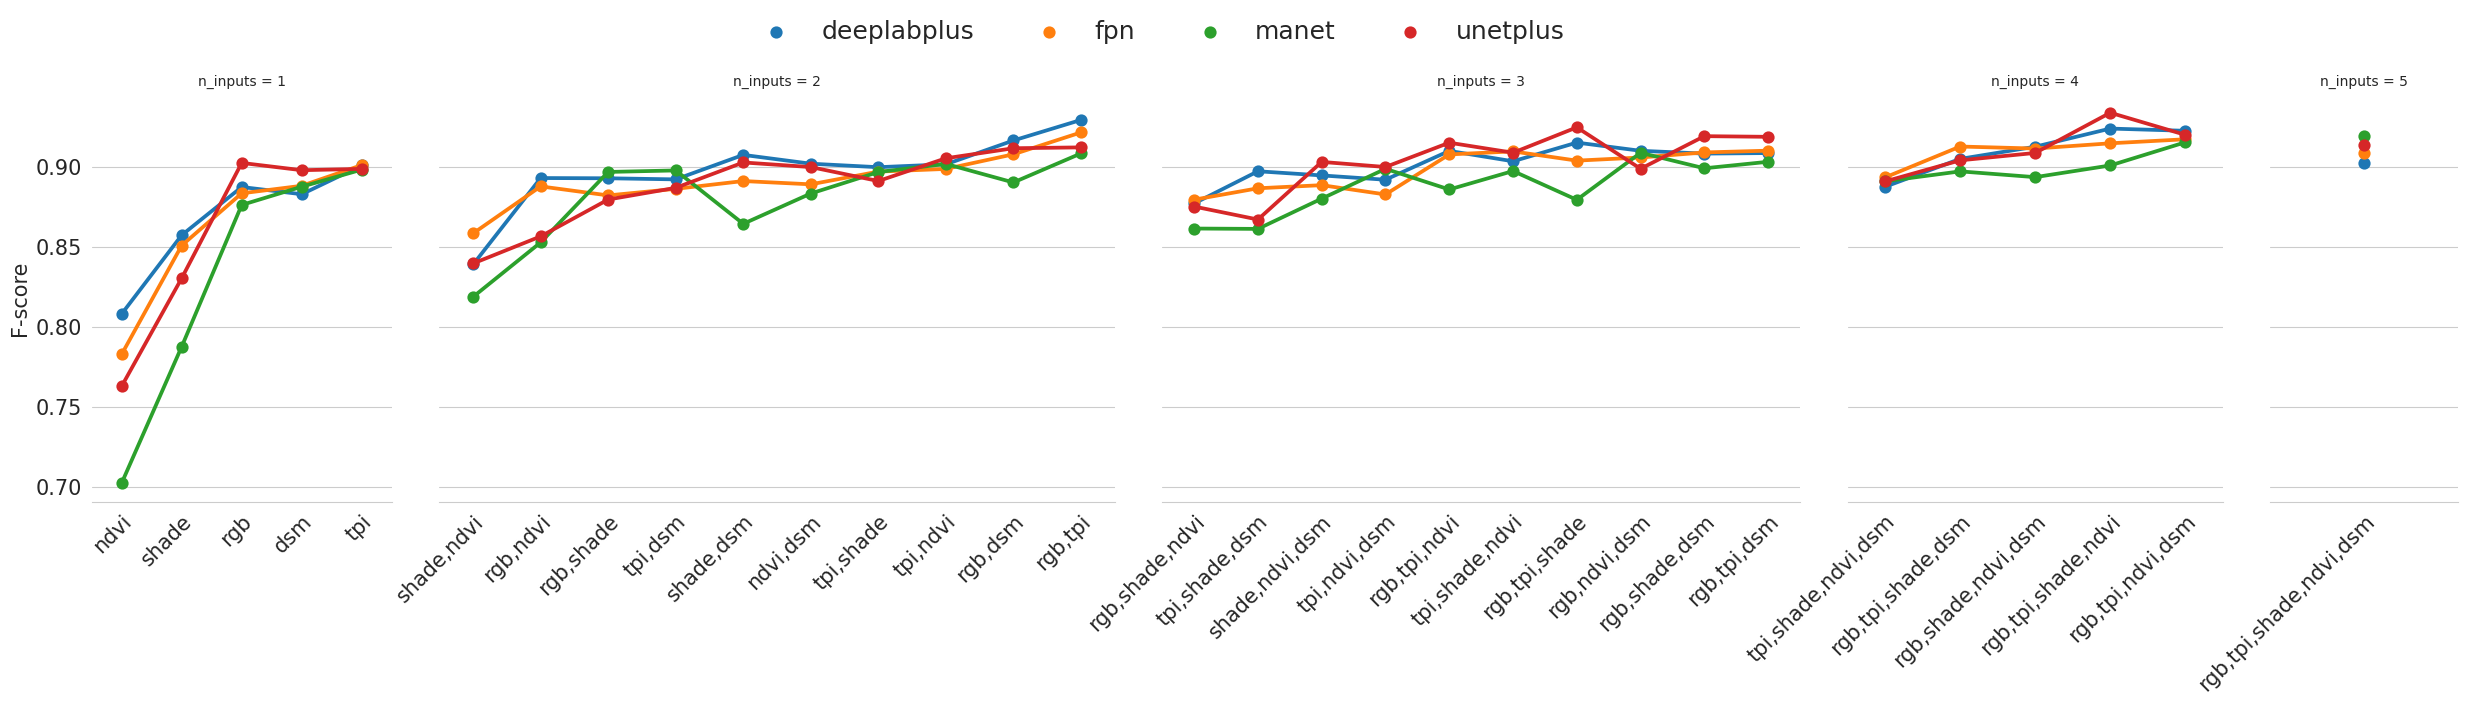

In [8]:
sns.set_style("whitegrid")
g = sns.catplot(x='inputs', y='fscore', 
            hue='model', col='n_inputs', sharex=False,
            data=df_val.sort_values(['n_inputs', 'fscore_avg_inputs']),
            kind='point',
            ci=None, 
            facet_kws=dict(gridspec_kws=dict(width_ratios=[0.8, 1.8, 1.7, 1.0, 0.5])),
            legend=False,
            legend_out=True)
sns.despine(left=True)
g.set_ylabels('F-score', fontsize=15)
for ax in g.axes.flatten():
    #ax.axes.tick_params(axis='x', rotation=45, ha='right')
    ax.set_xlabel('')
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor", fontsize=15)
    plt.setp(ax.get_yticklabels(), fontsize=15)
g.add_legend(bbox_to_anchor=(0.35, 1.1), loc='upper center', 
             borderaxespad=0, ncol=4, fontsize=18)
plt.savefig('/mnt/c/Users/TBGPEA-Sean/Desktop/cnn_results_summary_fscore.png',
            dpi=600, bbox_inches='tight', pad_inches=0.1)
plt.show()
#plt.close()
#plt.legend(bbox_to_anchor=(0.0, 1.02), loc='upper center', borderaxespad=0)

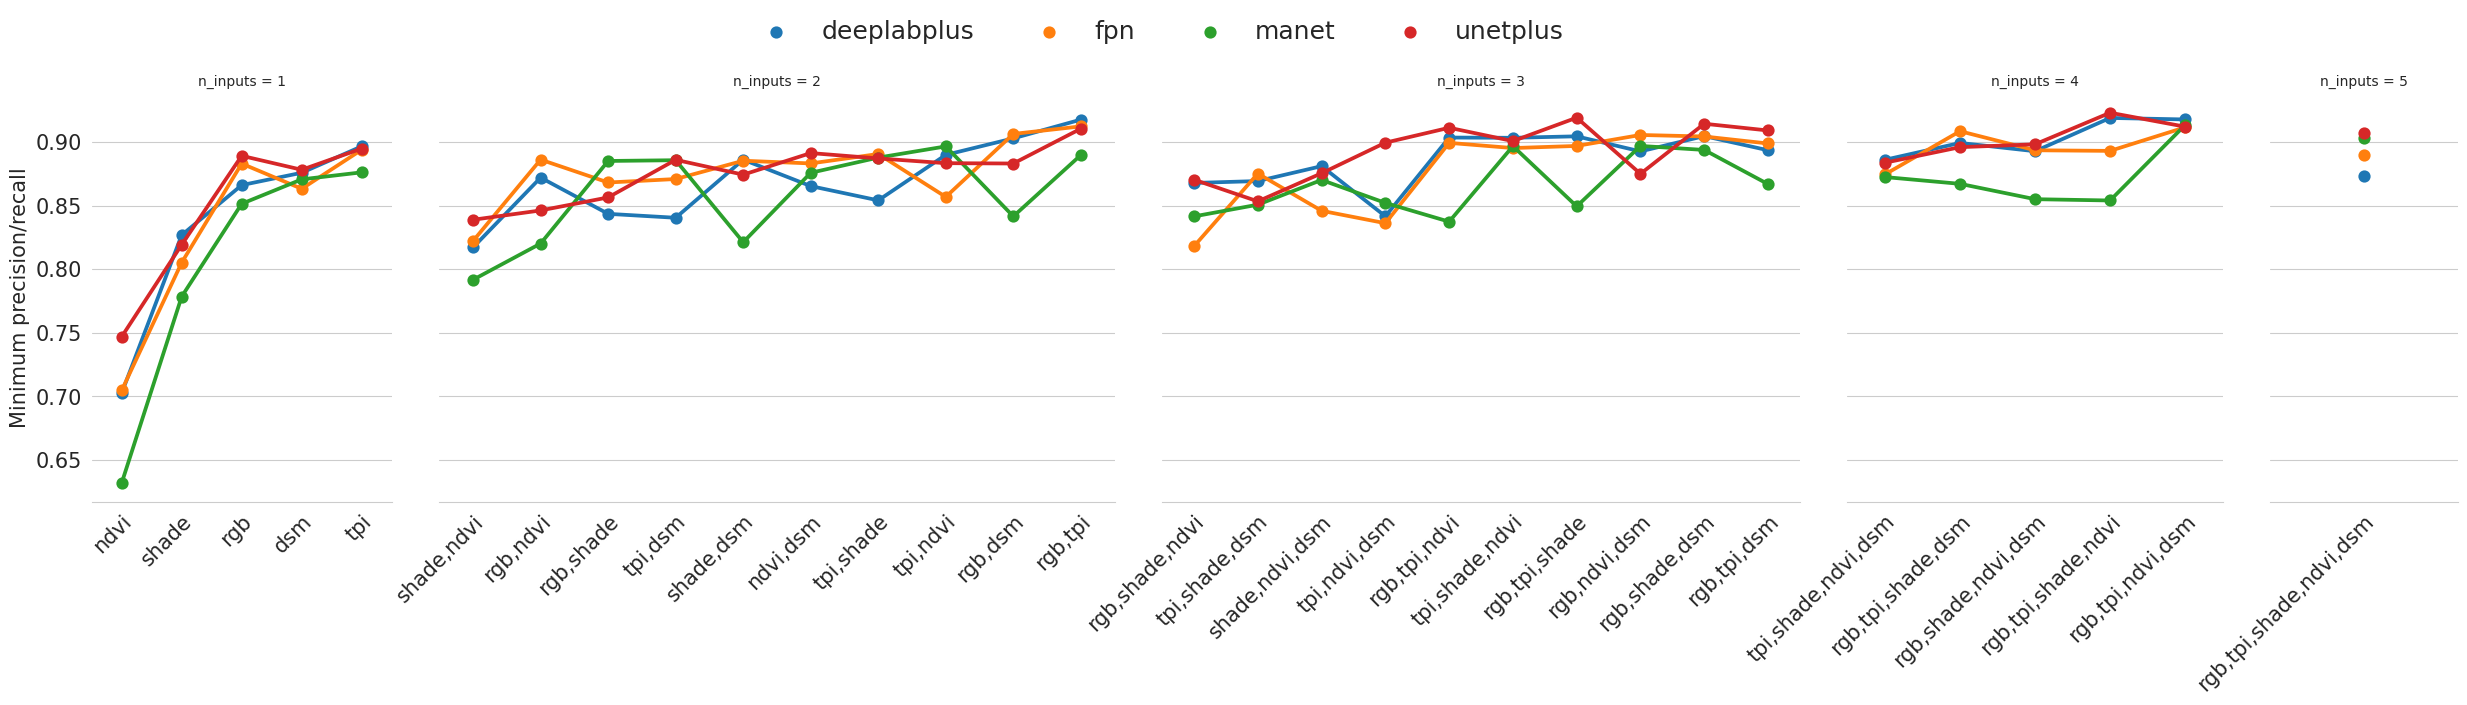

In [9]:
plt.close()
sns.set_style("whitegrid")
g = sns.catplot(x='inputs', y='min_rp', 
            hue='model', col='n_inputs', sharex=False,
            data=df_val.sort_values(['n_inputs', 'fscore_avg_inputs']),
            kind='point',
            ci=None, 
            facet_kws=dict(gridspec_kws=dict(width_ratios=[0.8, 1.8, 1.7, 1.0, 0.5])),
            legend=False,
            legend_out=True)
sns.despine(left=True)
g.set_ylabels('Minimum precision/recall', fontsize=15)
for ax in g.axes.flatten():
    #ax.axes.tick_params(axis='x', rotation=45, ha='right')
    ax.set_xlabel('')
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor", fontsize=15)
    plt.setp(ax.get_yticklabels(), fontsize=15)
g.add_legend(bbox_to_anchor=(0.35, 1.1), loc='upper center', 
             borderaxespad=0, ncol=4, fontsize=18)
plt.savefig('/mnt/c/Users/TBGPEA-Sean/Desktop/cnn_results_summary_minrp.png',
            dpi=600, bbox_inches='tight', pad_inches=0.1)
plt.show()

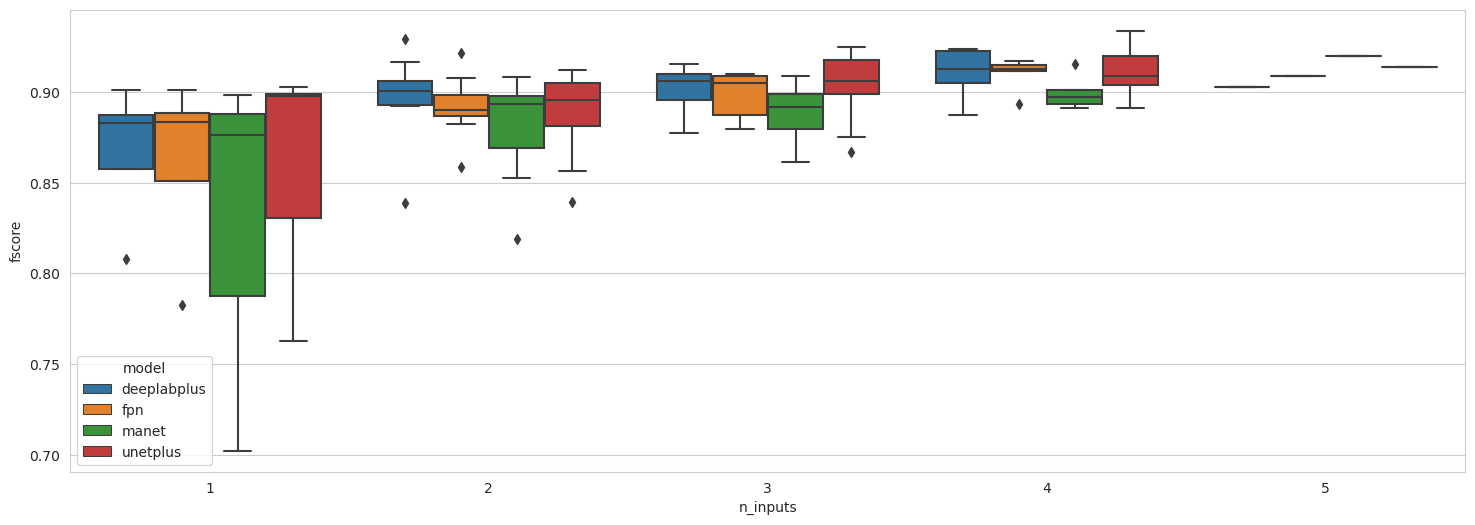

In [10]:
plt.close()
plottype = 'box'
var = 'fscore'
fig, ax = plt.subplots(figsize=(18, 6))
if plottype == 'point':
    sns.pointplot(x='n_inputs', y=var, 
                hue='model',
                data=df_val,
                  dodge=0.1,
                #ci=None,
                ax=ax)
elif plottype == 'box':
    sns.boxplot(x='n_inputs', y=var, 
                hue='model',
                data=df_val,
                ax=ax)
plt.savefig('/mnt/c/Users/TBGPEA-Sean/Desktop/cnn_results_summary_avg_' + var + '.png',
        dpi=600, bbox_inches='tight', pad_inches=0.1)
plt.show()

In [11]:
df_val[df_val['model'] == 'unetplus'].sort_values(['fscore'], ascending=False)

,mccloss,iou_score,accuracy,precision,recall,fscore,best_epoch,resolution,model,inputs,min_rp,n_inputs,fscore_old,fscore_avg_inputs,min_rp_avg_inputs
0,0.743204,0.877344,0.994782,0.923132,0.944633,0.933759,31,1.5,unetplus,"rgb,tpi,shade,ndvi",0.923132,4,0.915198,0.918278,0.897354
0,0.764600,0.855961,0.994129,0.919244,0.930099,0.924640,23,1.5,unetplus,"rgb,tpi,shade",0.919244,3,0.895101,0.905736,0.892590
0,0.762912,0.848922,0.994263,0.912150,0.927891,0.919953,19,1.5,unetplus,"rgb,tpi,ndvi,dsm",0.912150,4,0.887704,0.918729,0.913781
0,0.785860,0.846256,0.994501,0.914473,0.923823,0.919124,15,1.5,unetplus,"rgb,shade,dsm",0.914473,3,0.882484,0.908842,0.904391
0,0.770291,0.845540,0.994001,0.909179,0.928457,0.918717,25,1.5,unetplus,"rgb,tpi,dsm",0.909179,3,0.884760,0.910120,0.892179
0,0.791870,0.845436,0.994034,0.911320,0.918794,0.915042,24,1.5,unetplus,"rgb,tpi,ndvi",0.911320,3,0.884013,0.904620,0.887949
0,0.795849,0.837170,0.994028,0.906979,0.920177,0.913530,13,1.5,unetplus,"rgb,tpi,shade,ndvi,dsm",0.906979,5,0.874571,0.911118,0.893267
0,0.798068,0.839452,0.993275,0.910587,0.913654,0.912118,13,1.5,unetplus,"rgb,tpi",0.910587,2,0.877932,0.917786,0.907641
0,0.791694,0.832288,0.993372,0.883197,0.941847,0.911580,20,1.5,unetplus,"rgb,dsm",0.883197,2,0.871521,0.906499,0.883564
0,0.794384,0.826588,0.994027,0.916882,0.900820,0.908780,18,1.5,unetplus,"tpi,shade,ndvi",0.900820,3,0.861329,0.904790,0.899121


## Test best model

### Set parameters and datasets

In [12]:
from random import sample, seed

In [13]:
model_fnl = 'unetplus'
inputs_fnl = ['rgb', 'tpi', 'shade']

In [14]:
ENCODER = 'resnet34'
ENCODER_WEIGHTS = 'imagenet'
CLASSES = ['burrow']
ACTIVATION = 'sigmoid' # could be None for logits or 'softmax2d' for multiclass segmentation
DEVICE = 'cuda'# 'cpu'# 

In [15]:
# set directories for training data and labels
DATA_FOLDER = './cnn_train_images/{}_{}.tif'
LABEL_FOLDER = './cnn_train_labels/{}_labels.tif'

In [16]:
# read in csvs with training information
df_tiles = pd.read_csv('train_tiles/train_bboxes_all_assigned.csv')
df_polys = pd.read_csv('train_polys/train_polys_all.csv')

In [17]:
# get all ids to be used
label_files = glob(LABEL_FOLDER.replace('{}', '*'))
all_ids = [re.sub('_labels.tif', '', os.path.basename(f)) for f in label_files]
all_tiles = list(set(['_'.join(y.split('_')[-3:]) for y in all_ids]))

In [18]:
# separate training and test data and get paths to files
all_files = glob(DATA_FOLDER.replace('{}', '*'))
all_train_tiles = [x for x in df_tiles.apply(lambda x: '_'.join([x.Pasture, x.Tile]) if x.Train == 1 else '', axis=1) if x != '' and x in all_tiles]
test_tiles = list(set(all_tiles) - set(all_train_tiles))

all_train_ids = [x for x in all_ids if '_'.join(x.split('_')[-3:]) in all_train_tiles]
test_ids = list(set(all_ids) - set(all_train_ids))

seed(321)
valid_ids = sample(all_train_ids, int(np.ceil(len(all_train_ids)*0.3)))
train_ids = list(set(all_train_ids) - set(valid_ids))

train_files = [f for f in all_files if '_'.join(os.path.basename(f).split('_')[:-1]) in train_ids]
valid_files = [f for f in all_files if '_'.join(os.path.basename(f).split('_')[:-1]) in valid_ids]
test_files = [f for f in all_files if '_'.join(os.path.basename(f).split('_')[:-1]) in test_ids]

### Dataloader
Writing helper class for data extraction, tranformation and preprocessing

In [19]:
from torch.utils.data import DataLoader
from torch.utils.data import Dataset as BaseDataset
from skimage import io
import torch
import segmentation_models_pytorch as smp
from segmentation_models_pytorch import utils

In [20]:
class Dataset(BaseDataset):
    """Read images, apply augmentation and preprocessing transformations.
    
    Args:
        ids (list): list of unique ids for all images
        images_path (str): path to data images
        masks_path (str): path to label masks
        class_values (list): values of classes to extract from segmentation mask
        augmentation (albumentations.Compose): data transfromation pipeline 
            (e.g. flip, scale, etc.)
        preprocessing (albumentations.Compose): data preprocessing 
            (e.g. noralization, shape manipulation, etc.)
    
    """
    
    
    CLASSES = ['other', 'burrow']
    
    def __init__(
            self, 
            ids,
            suffix_list,
            images_path,
            masks_path, 
            classes=None, 
            augmentation=None, 
            preprocessing=None,
            suffix_dict = {
        'rgb': {'channels': 3,
                'dtype': 'uint8'},
        'tpi': {'channels': 1,
                'dtype': 'float32'},
        'dsm': {'channels': 1,
                'dtype': 'float32'},
        'shade': {'channels': 1,
                  'dtype': 'float32'},
        'ndvi': {'channels': 1,
                  'dtype': 'float32'}
    }
    ):
        # get IDs as attribute
        self.ids = ids
        
        # get suffix info
        self.suffix_dict = suffix_dict
        
        # get list of suffixes as attribute
        self.suffix_list = suffix_list
        
        # List of files
        self.images_fps = []
        self.masks_fps = [masks_path.format(id) for id in ids]
        for id in ids:
            self.images_fps.append({s: images_path.format(id, s) for s in suffix_list})
            
        
        # convert str names to class values on masks
        self.class_values = [self.CLASSES.index(cls.lower()) for cls in classes]
        
        self.augmentation = augmentation
        self.preprocessing = preprocessing
    
    def __getitem__(self, i):
        
        # read data
        image_list = []
        self.image_dict = {}
        for s in self.suffix_list:
            image_s = np.asarray(io.imread(self.images_fps[i][s]), dtype=self.suffix_dict[s]['dtype'])
            if len(image_s.shape) == 2:
                image_s = np.expand_dims(image_s, axis=-1)
            image_s[np.isnan(image_s)] = 0
            if s == 'ndvi':
                image_s[image_s < 0] = 0
            if self.preprocessing:
                image_s = normalize_fn(image_s, s, image_stats)
            image_list.append(image_s)
            self.image_dict[s] = image_s
        if len(image_list) == 1:
            image = image_list[0]
        else:
            image = np.concatenate(image_list, axis=-1)
        mask = np.asarray(io.imread(self.masks_fps[i]), dtype='float32')
        #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #mask = cv2.imread(self.masks_fps[i], 0)
        
        # extract certain classes from mask (e.g. cars)
        masks = [(mask == v) for v in self.class_values]
        mask = np.stack(masks, axis=-1)#.astype('float32')
        #print('fetched: ', self.ids[i])
        # apply augmentations
        if self.augmentation:
            sample = self.augmentation(image=image, mask=mask)
            image, mask = sample['image'], sample['mask']

        # convert final image arrays to tensors
        image = torch.from_numpy(image.transpose(2, 0, 1).astype('float32'))
        mask = torch.from_numpy(mask.transpose(2, 0, 1).astype('float32'))
        return image, mask
        
    def __len__(self):
        return len(self.ids)




In [21]:
# create function to normalize all data in range 0-1
def normalize_fn(image, image_suffix, stats_dict):
    if image_suffix in stats_dict.keys():
        min_tmp = stats_dict[image_suffix]['min']
        max_tmp = stats_dict[image_suffix]['max']
    else:
        # normalize to individual image if min/max stats not specified in dictionary
        min_tmp = np.min(image)
        max_tmp = np.max(image)
    return (image - min_tmp) / (max_tmp - min_tmp)
    
        

### Test the best model

In [22]:
# load best saved checkpoint
best_model = torch.load('./cnn_results_' + model_fnl + '/best_model_' + '_'.join(inputs_fnl) + '.pth')

# load the image stats from the training data
df_image_stats = pd.read_csv('./_utils/image_stats.csv').set_index('stat')

# convert image stats dictionary to dataframe
image_stats = {i: {'min': df_image_stats.loc['min', i],
                   'max': df_image_stats.loc['max', i]} for i in [x for x in inputs_fnl if x != 'dsm']}

In [23]:
# test dataset without transformations for image visualization
test_dataset = Dataset(
    test_ids,
    inputs_fnl,
    DATA_FOLDER,
    LABEL_FOLDER,
    preprocessing=True,
    classes=CLASSES)

test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=False, num_workers=0)

In [24]:
#next(iter(test_dataloader))[0]#.shape#.squeeze().transpose(0, 2).transpose(1, 2).shape

In [25]:
best_model.eval()

with torch.no_grad():
    prediction = best_model.forward(next(iter(test_dataloader))[0].cuda())

In [26]:
#prediction

In [27]:
test_metrics = [
    utils.metrics.IoU(threshold=0.5),
    utils.metrics.Accuracy(threshold=0.5),
    utils.metrics.Precision(threshold=0.5),
    utils.metrics.Recall(threshold=0.5),
    utils.metrics.Fscore(threshold=0.5)
]

loss = smp.losses.MCCLoss()
loss.__name__ = 'mccloss'

In [28]:
# evaluate model on test set
if True:
    test_epoch = utils.train.ValidEpoch(
        model=best_model,
        loss=loss,
        metrics=test_metrics,
        device=DEVICE,
        verbose=True,
    )

    logs = test_epoch.run(test_dataloader)
    print({k: round(logs[k], 2) for k in logs})

valid: 100%|█| 446/446 [00:33<00:00, 13.17it/s, mccloss - 0.5845, iou_score - 0.693, accuracy - 0.9883, precision - 0.82
{'mccloss': 0.58, 'iou_score': 0.69, 'accuracy': 0.99, 'precision': 0.82, 'recall': 0.84, 'fscore': 0.77}


In [29]:
print({k: round(logs[k], 2) for k in logs})

{'mccloss': 0.58, 'iou_score': 0.69, 'accuracy': 0.99, 'precision': 0.82, 'recall': 0.84, 'fscore': 0.77}


### Quantify and Visualize Test Data Predictions

In [30]:
import itertools
from shapely.geometry import Polygon, MultiPolygon
import geopandas as gpd
import rasterio as rio
from rasterio.features import rasterize
from rasterio import mask
from rasterio.plot import show
import shapely.wkt as wkt
from rasterio.enums import Resampling
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops
import torch.nn as nn

In [31]:
# helper function for data visualization
def visualize(show=True, write=False, path=None, **images):
    """PLot images in one row."""
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    if show:
        plt.show()
    if write:
        plt.savefig(path)
    if not show and write:
        plt.close()

In [32]:
test_dataset_vis = Dataset(
    test_ids,
    inputs_fnl,
    DATA_FOLDER,
    LABEL_FOLDER,
    preprocessing=True,
    classes=CLASSES)

In [33]:
df_polys['geometry'] = df_polys.geometry.apply(lambda x: Polygon(wkt.loads(x)))
gdf_polys = gpd.GeoDataFrame(df_polys, geometry='geometry')
gdf_polys = gdf_polys.set_crs(32613)

In [34]:
preprocess = True

precision_list = []
recall_list = []

burrow_ct_gt = []
burrow_ct_pred = []
tile_id_list = []

for ID in df_tiles['ID'][(df_tiles['Train'] == 0) &
                         (df_tiles['Digitize'] == 1) &
                         (df_tiles['trainer'] != 'Nick')]:
    if all(df_tiles[df_tiles['ID'] == ID]['Train'] == 1):
        continue
    else:
        print(ID)
        # get the path base to the imagery associated with the training tile
        if external_path is None:
            tilePATH = df_tiles[df_tiles['ID'] == ID]['path_pre'].iloc[0]
        else:
            tilePATH = os.path.join(external_path,
                                    df_tiles[df_tiles['ID'] == ID]['path_pre'].iloc[0])
        # get the x/y coordinates of the bounding box for the training polygon within the tile
        box_coords_x = df_tiles[df_tiles['ID'] == ID][['min_x', 'max_x']].iloc[0].values
        box_coords_y = df_tiles[df_tiles['ID'] == ID][['min_y', 'max_y']].iloc[0].values
        # get the box coordinate pairs
        ll, ul, lr, ur = list(itertools.product(box_coords_x, box_coords_y))
        # create a polygon from the coordinate pairs
        tile_geom = Polygon([ll, ul, ur, lr])
        # create the full path to the RGB image of the training tile
        rgb_path = tilePATH + 'rgb.tif'
        with rio.open(rgb_path) as src_rgb:   
            profile_rgb = src_rgb.meta
            rgb_out, transform_out = mask.mask(src_rgb,
                                               [tile_geom],
                                               crop=True)
            rgb_out = rgb_out.astype('int')
            #rgb_out = rgb_out[:, -win_size:, :win_size]
            #show(rgb_out)
            ll_i = src_rgb.index(*ll)
            ur_i = src_rgb.index(*ur)
            gdf_polys_sub = gdf_polys[gdf_polys['Tile'] == ID]
            if len(gdf_polys_sub) > 0:
                label_mask = rasterize(gdf_polys_sub.geometry, 
                                  out_shape=rgb_out.shape[1:], transform=transform_out,
                                  default_value=1)
            else:
                 label_mask = np.zeros_like(rgb_out[0, :, :])   
            #label = label[ll_i[0]:ur_i[0], ll_i[1]:ur_i[1]]
            profile_rgb.update({'dtype': 'int16',
                                'width': rgb_out.shape[0],
                                'height': rgb_out.shape[1],
                                'transform': transform_out})
            profile_single = profile_rgb.copy()
            profile_single.update({'count': 1})
            profile_single_float = profile_single.copy()
            profile_single_float.update({'dtype': 'float64'})
            #show(label)

        n_row_chunks = int(np.ceil(rgb_out.shape[1]/256))
        n_col_chunks = int(np.ceil(rgb_out.shape[2]/256))

        pr_mask = np.empty_like(rgb_out[0, :, :])
        image_dict = {}
        for suffix in inputs_fnl:
            with rio.open(re.sub('rgb', suffix, rgb_path)) as src_i:
                i_out = src_i.read(out_shape=(
                    src_i.count,
                    src_rgb.meta['height'],
                    src_rgb.meta['width']),
                                   resampling=Resampling.bilinear)
                image_dict[suffix] = i_out[:, ll_i[1]-1:ur_i[1]+1, ur_i[0]-1:ll_i[0]+1]
        image_sub_dict = {}
        for r in range(n_row_chunks):
            if (r + 1) * 256 > rgb_out.shape[1]:
                r_min = rgb_out.shape[1] - 256
                r_max = rgb_out.shape[1]
            else:
                r_min = r * 256
                r_max = (r + 1) * 256
            for c in range(n_col_chunks):
                if (c + 1) * 256 > rgb_out.shape[2]:
                    c_min = rgb_out.shape[2] - 256
                    c_max = rgb_out.shape[2]
                else:
                    c_min = c * 256
                    c_max = (c + 1) * 256
                for k in image_dict:
                    image_sub_dict[k] = image_dict[k][:, r_min:r_max, c_min:c_max].astype('float32')
                if 'rgb' in inputs_fnl:
                    image_sub_dict['rgb'] = rgb_out[:, r_min:r_max, c_min:c_max].astype('float32')
                if preprocess:
                    for i in image_sub_dict:
                        image_sub_dict[i] = normalize_fn(image_sub_dict[i], i, image_stats)
                image_list = [image_sub_dict[i] for i in inputs_fnl]
                image_out = np.concatenate(image_list, axis=0)
                x_tensor = torch.from_numpy(image_out).to(DEVICE).unsqueeze(0)
                if type(best_model) == nn.DataParallel:
                    pr_mask[r_min:r_max, c_min:c_max] = best_model.module.predict(x_tensor).cpu().detach().numpy().squeeze() > 0.5
                else:
                    pr_mask[r_min:r_max, c_min:c_max] = best_model.predict(x_tensor).cpu().detach().numpy().squeeze() > 0.5

        # get regions and properties of the ground truth and predictions
        label_labels = label(label_mask)
        label_regions = regionprops(label_labels)
        pr_labels = label(pr_mask)
        pr_regions = regionprops(pr_labels)
        
        r_ct_pred = 0
        for r in pr_regions:
            if r.area*src_rgb.meta['transform'][0]**2 > 0.05:
                y_pr, x_pr = r.centroid
                precision_list.append(label_mask[int(y_pr), int(x_pr)])
                r_ct_pred += 1

        r_ct_gt = 0
        for r in label_regions:
            y_label, x_label = r.centroid
            recall_list.append(pr_mask[int(y_label), int(x_label)])
            r_ct_gt += 1
        burrow_ct_gt.append(r_ct_gt)
        burrow_ct_pred.append(r_ct_pred)
        tile_id_list.append(ID)

5W_9
5W_14
22W_10
22E_5
22E_13
29-30_40
CN_5
CN_14
22W_7
CN_54
CN_35
CN_6
CN_26
22E_9
29-30_8
CN_52
CN_49
29-30_46
29-30_10
CN_10
CN_18
CN_46
22E_12
CN_43
22W_5
29-30_32
22W_11
CN_38
22E_7
5W_6
29-30_42
CN_29
29-30_30
22W_15
22E_1
CN_12
CN_0
29-30_44
29-30_14
CN_59
CN_50
CN_44
22W_1
CN_16


In [35]:
precision = np.sum(precision_list) / len(precision_list)
recall = np.sum(recall_list) / len(recall_list)
fscore = (2 * precision * recall) / (precision + recall)
corr = np.corrcoef(burrow_ct_gt, burrow_ct_pred)[0, 1]

In [36]:
print('--- Results for ' + str(len(tile_id_list)) + ' test tiles (excluding predicted burrows < 0.05 m^2) ---')
print('precision: ' + str(round(precision, 2)))
print('recall: ' + str(round(recall, 2)))
print('f-score: ' + str(round(fscore, 2)))
print('burrow count correlation: ' + str(round(corr, 2)))

--- Results for 44 test tiles (excluding predicted burrows < 0.05 m^2) ---
precision: 0.75
recall: 0.86
f-score: 0.8
burrow count correlation: 0.91


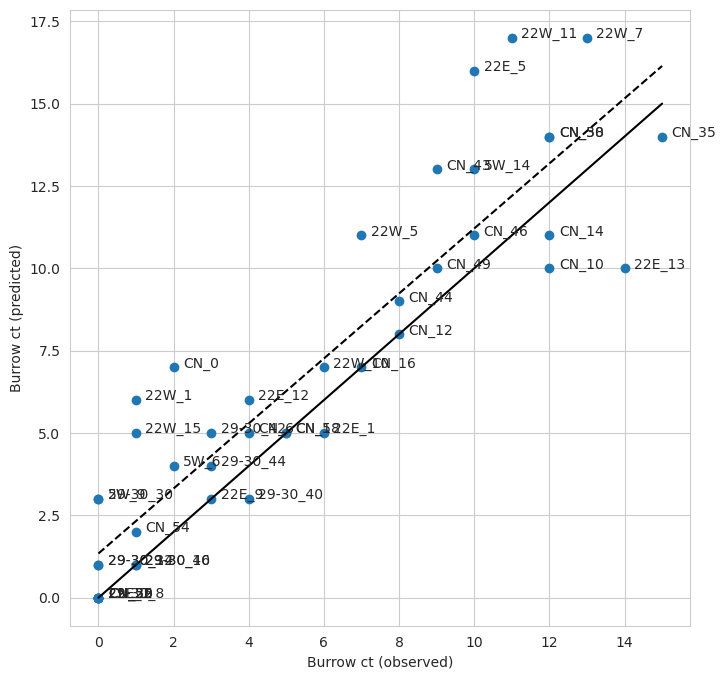

In [37]:
plt.figure(figsize=(8, 8))
plt.scatter(x=burrow_ct_gt, y=burrow_ct_pred)
plt.xlabel('Burrow ct (observed)')
plt.ylabel('Burrow ct (predicted)')
plt.plot(np.arange(0, 16), np.arange(0, 16), c='black')
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(burrow_ct_gt, burrow_ct_pred, 1)
#add linear regression line to scatterplot 
plt.plot(np.arange(0, 16), m*np.arange(0, 16)+b, 
         linestyle='dashed', c='black')

if True:
    for i in range(len(burrow_ct_gt)):
        plt.text(x=burrow_ct_gt[i]+0.25,
                 y=burrow_ct_pred[i],
                 s=tile_id_list[i])
plt.show()

### Test against ground data

In [38]:
df_bboxes_22E = pd.read_csv('train_tiles/train_bboxes_22E.csv')
df_bboxes_22W = pd.read_csv('train_tiles/train_bboxes_22W.csv')
df_bboxes_5W = pd.read_csv('train_tiles/train_bboxes_5W.csv')
df_bboxes_2930 = pd.read_csv('train_tiles/train_bboxes_29-30.csv')
df_bboxes_CN = pd.read_csv('train_tiles/train_bboxes_CN.csv')
df_bboxes_all = pd.concat([df_bboxes_22E, df_bboxes_22W, df_bboxes_5W, df_bboxes_2930, df_bboxes_CN])

In [39]:
df_bboxes_all = df_bboxes_all[df_bboxes_all['Type'] != 'random'].copy()

In [40]:
df_bboxes_all['path_pre'] = df_bboxes_all.apply(lambda x: os.path.join('train_tiles',
                                                                       '_'.join(x[['Pasture', 'Type']]), 
                                                                       '_'.join(x[['Pasture', 'Tile']]) + '_'), axis=1)

In [41]:
gdf_pdog_burrows = gpd.read_file('ground_data/cper_pdog_points_2021Sept_burrows.shp')
gdf_pdog_other = gpd.read_file('ground_data/cper_pdog_points_2021Sept_other.shp')
gdf_pdog_old = gpd.read_file('ground_data/cper_pdog_points_old_2021Sept.shp')
gdf_pdog_non = gpd.read_file('ground_data/cper_pdog_points_non_2021Sept.shp')
gdf_pdog_points = pd.concat([gdf_pdog_burrows, gdf_pdog_other, gdf_pdog_old, gdf_pdog_non], ignore_index=True)

In [42]:
gdf_plots = gpd.read_file('ground_data/cper_pdog_polys_2021Sept.shp')
gdf_plots_non = gpd.read_file('ground_data/cper_pdog_polys_non_2021Sept.shp')
gdf_plots_old = gpd.read_file('ground_data/cper_pdog_polys_old_2021Sept.shp')
gdf_plots_all = pd.concat([gdf_plots, gdf_plots_non, gdf_plots_old], ignore_index=True)

In [43]:
df_bboxes_all[df_bboxes_all['Pasture'] == '5W']
#gdf_pdog_points[gdf_pdog_points['Pasture'] == 'CN']

,ID,Pasture,Tile,min_x,min_y,Type,Train,Digitize,Poly_ID,max_x,max_y,img_group,path_pre
12,5W_12,5W,burrows_active_0,525720.0,4522838.0,burrows_active,0,0,NaN,525750.0,4522868.0,group_1,train_tiles/5W_burrows_active/5W_burrows_activ...
13,5W_13,5W,burrows_active_1,525720.0,4522868.0,burrows_active,0,1,NaN,525750.0,4522898.0,group_1,train_tiles/5W_burrows_active/5W_burrows_activ...
14,5W_14,5W,burrows_active_2,525750.0,4522838.0,burrows_active,0,1,NaN,525780.0,4522868.0,group_1,train_tiles/5W_burrows_active/5W_burrows_activ...
15,5W_15,5W,burrows_active_3,525750.0,4522868.0,burrows_active,0,0,NaN,525780.0,4522898.0,group_1,train_tiles/5W_burrows_active/5W_burrows_activ...
16,5W_16,5W,burrows_old_0,525627.0,4523383.0,burrows_old,0,0,NaN,525657.0,4523413.0,group_1,train_tiles/5W_burrows_old/5W_burrows_old_0_
17,5W_17,5W,burrows_old_1,525627.0,4523413.0,burrows_old,0,0,NaN,525657.0,4523443.0,group_1,train_tiles/5W_burrows_old/5W_burrows_old_1_
18,5W_18,5W,burrows_old_2,525657.0,4523383.0,burrows_old,0,0,NaN,525687.0,4523413.0,group_1,train_tiles/5W_burrows_old/5W_burrows_old_2_
19,5W_19,5W,burrows_old_3,525657.0,4523413.0,burrows_old,0,0,NaN,525687.0,4523443.0,group_1,train_tiles/5W_burrows_old/5W_burrows_old_3_
20,5W_20,5W,non_burrows_0,525630.0,4523259.0,non_burrows,0,0,NaN,525660.0,4523289.0,group_1,train_tiles/5W_non_burrows/5W_non_burrows_0_
21,5W_21,5W,non_burrows_1,525630.0,4523289.0,non_burrows,0,0,NaN,525660.0,4523319.0,group_1,train_tiles/5W_non_burrows/5W_non_burrows_1_


In [44]:
preprocess = True

for ID in df_bboxes_all['ID']:
    print(ID)
    # get the path base to the imagery associated with the training tile
    if external_path is None:
        tilePATH = df_bboxes_all[df_bboxes_all['ID'] == ID]['path_pre'].iloc[0]
    else:
        tilePATH = os.path.join(external_path,
                                df_bboxes_all[df_bboxes_all['ID'] == ID]['path_pre'].iloc[0])
    # get the x/y coordinates of the bounding box for the training polygon within the tile
    box_coords_x = df_bboxes_all[df_bboxes_all['ID'] == ID][['min_x', 'max_x']].iloc[0].values
    box_coords_y = df_bboxes_all[df_bboxes_all['ID'] == ID][['min_y', 'max_y']].iloc[0].values
    # get the box coordinate pairs
    ll, ul, lr, ur = list(itertools.product(box_coords_x, box_coords_y))
    # create a polygon from the coordinate pairs
    tile_geom = Polygon([ll, ul, ur, lr])
    # create the full path to the RGB image of the training tile
    rgb_path = tilePATH + 'rgb.tif'
    with rio.open(rgb_path) as src_rgb:   
        profile_rgb = src_rgb.meta
        rgb_out, transform_out = mask.mask(src_rgb,
                                           [tile_geom],
                                           crop=True)
        rgb_out = rgb_out.astype('int')
        #rgb_out = rgb_out[:, -win_size:, :win_size]
        #show(rgb_out)
        ll_i = src_rgb.index(*ll)
        ur_i = src_rgb.index(*ur)
        gdf_polys_sub = gdf_polys[gdf_polys['Tile'] == ID]
        if len(gdf_polys_sub) > 0:
            label_mask = rasterize(gdf_polys_sub.geometry, 
                              out_shape=rgb_out.shape[1:], transform=transform_out,
                              default_value=1)
        else:
             label_mask = np.zeros_like(rgb_out[0, :, :])   
        #label = label[ll_i[0]:ur_i[0], ll_i[1]:ur_i[1]]
        profile_rgb.update({'dtype': 'int16',
                            'height': rgb_out.shape[0],
                            'width': rgb_out.shape[1],
                            'transform': transform_out})
        profile_single = profile_rgb.copy()
        profile_single.update({'count': 1})
        profile_single_float = profile_single.copy()
        profile_single_float.update({'dtype': 'float64'})
        #show(label)

    n_row_chunks = int(np.ceil(rgb_out.shape[1]/256))
    n_col_chunks = int(np.ceil(rgb_out.shape[2]/256))

    pr_mask = np.empty_like(rgb_out[0, :, :])
    image_dict = {}
    for suffix in inputs_fnl:
        with rio.open(re.sub('rgb', suffix, rgb_path)) as src_i:
            i_out = src_i.read(out_shape=(
                src_i.count,
                src_rgb.meta['height'],
                src_rgb.meta['width']),
                               resampling=Resampling.bilinear)
            image_dict[suffix] = i_out[:, ll_i[1]-1:ur_i[1]+1, ur_i[0]-1:ll_i[0]+1]
    image_sub_dict = {}
    for r in range(n_row_chunks):
        if (r + 1) * 256 > rgb_out.shape[1]:
            r_min = rgb_out.shape[1] - 256
            r_max = rgb_out.shape[1]
        else:
            r_min = r * 256
            r_max = (r + 1) * 256
        for c in range(n_col_chunks):
            if (c + 1) * 256 > rgb_out.shape[2]:
                c_min = rgb_out.shape[2] - 256
                c_max = rgb_out.shape[2]
            else:
                c_min = c * 256
                c_max = (c + 1) * 256
            for k in image_dict:
                image_sub_dict[k] = image_dict[k][:, r_min:r_max, c_min:c_max].astype('float32')
            if 'rgb' in inputs_fnl:
                image_sub_dict['rgb'] = rgb_out[:, r_min:r_max, c_min:c_max].astype('float32')
            if preprocess:
                for i in image_sub_dict:
                    image_sub_dict[i] = normalize_fn(image_sub_dict[i], i, image_stats)
            image_list = [image_sub_dict[i] for i in inputs_fnl]
            image_out = np.concatenate(image_list, axis=0)
            x_tensor = torch.from_numpy(image_out).to(DEVICE).unsqueeze(0)
            if type(best_model) == nn.DataParallel:
                pr_mask[r_min:r_max, c_min:c_max] = best_model.module.predict(x_tensor).cpu().detach().numpy().squeeze() > 0.5
            else:
                pr_mask[r_min:r_max, c_min:c_max] = best_model.predict(x_tensor).cpu().detach().numpy().squeeze() > 0.5
    
    # create mask of ground-truth polygon
    gt_plot_mask = rasterize(gdf_plots_all.geometry, 
                             out_shape=rgb_out.shape[1:], transform=transform_out,
                             default_value=1)
    
    # get predictions for ground-truth points
    gdf_pdog_points_sub = gdf_pdog_points[gdf_pdog_points.geometry.within(tile_geom)]
    if len(gdf_pdog_points_sub) > 0:
        all_points_mask = rasterize(gdf_pdog_points_sub.geometry.buffer(0.5), 
                                      out_shape=rgb_out.shape[1:], transform=transform_out,
                                      default_value=1)      
    else:
        all_points_mask = np.zeros_like(rgb_out[0, :, :]) 
    
    # mask all arrays to ground-truth polygon
    pr_mask = pr_mask * gt_plot_mask
    label_mask = label_mask * gt_plot_mask
    all_points_mask = all_points_mask * gt_plot_mask
    
    
    # get regions and properties of the ground truth and predictions
    label_labels = label(label_mask)
    label_regions = regionprops(label_labels)
    pr_labels = label(pr_mask)
    pr_regions = regionprops(pr_labels)
    
    ground_pred_precision_list = []
    ground_label_precision_list = []
    r_ct_pred = 0
    for r in pr_regions:
        if r.area*src_rgb.meta['transform'][0]**2 > 0.05:
            y_pr, x_pr = r.centroid
            ground_pred_precision_list.append(all_points_mask[int(y_pr), int(x_pr)])
            r_ct_pred += 1

    r_ct_label = 0
    for r in label_regions:
        y_label, x_label = r.centroid
        ground_label_precision_list.append(all_points_mask[int(y_label), int(x_label)])
        r_ct_label += 1
        
    df_bboxes_all.loc[df_bboxes_all['ID'] == ID, 'pred_ct'] = len(ground_pred_precision_list)
    df_bboxes_all.loc[df_bboxes_all['ID'] == ID, 'pred_correct_ct'] = np.sum(ground_pred_precision_list)
    df_bboxes_all.loc[df_bboxes_all['ID'] == ID, 'label_ct'] = len(ground_label_precision_list)
    df_bboxes_all.loc[df_bboxes_all['ID'] == ID, 'label_correct_ct'] = np.sum(ground_label_precision_list)
    df_bboxes_all.loc[df_bboxes_all['ID'] == ID, 'gt_ct'] = len(gdf_pdog_points_sub[gdf_pdog_points_sub['is_burrow'] == 1])

    if len(gdf_pdog_points_sub) > 0:
        print('comparing to ground data')
        for idx, point in gdf_pdog_points_sub.iterrows():
            point_mask = rasterize([point.geometry.buffer(0.5)], 
                                  out_shape=rgb_out.shape[1:], transform=transform_out,
                                  default_value=1)
            point_labels = label(point_mask)
            point_regions = regionprops(point_labels)
            y_gt, x_gt = point_regions[0].centroid
            gdf_pdog_points.loc[idx, 'pred'] = pr_mask[int(y_gt), int(x_gt)]
            gdf_pdog_points.loc[idx, 'label'] = label_mask[int(y_gt), int(x_gt)]

22E_11
comparing to ground data
22E_12
comparing to ground data
22E_13
comparing to ground data
22E_14
comparing to ground data
22W_9
comparing to ground data
22W_10
comparing to ground data
22W_11
comparing to ground data
22W_12
comparing to ground data
5W_12
comparing to ground data
5W_13
comparing to ground data
5W_14
comparing to ground data
5W_15
comparing to ground data
5W_16
comparing to ground data
5W_17
comparing to ground data
5W_18
comparing to ground data
5W_19
comparing to ground data
5W_20
5W_21
5W_22
5W_23
5W_24
comparing to ground data
5W_25
5W_26
5W_27
5W_28
comparing to ground data
5W_29
comparing to ground data
5W_30
5W_31
5W_32
comparing to ground data
5W_33
5W_34
comparing to ground data
5W_35
5W_36
5W_37
comparing to ground data
5W_38
comparing to ground data
5W_39
5W_40
5W_41
5W_42
comparing to ground data
5W_43
comparing to ground data
5W_44
5W_45
5W_46
comparing to ground data
5W_47
comparing to ground data
5W_48
5W_49
5W_50
comparing to ground data
5W_51
compa

In [45]:
print('Prediction precision by Pasture')
df_bboxes_all.groupby('Pasture').apply(lambda x: x['pred_correct_ct'].sum()/x['pred_ct'].sum())

Prediction precision by Pasture


Pasture
22E      0.826087
22W      0.733333
29-30    0.846154
5W       0.255556
CN       0.810526
dtype: float64

In [46]:
print('Prediction recall by Pasture')
gdf_pdog_points.groupby('Pasture').apply(lambda x: ((x['is_burrow'] == 1) &
                                                    (x['pred'] == 1)).sum() / (x['is_burrow'] == 1).sum())

Prediction recall by Pasture


Pasture
22E      0.612903
22W      0.904762
29-30    0.729412
5W       0.630435
CN       0.777778
dtype: float64

In [47]:
pred_corr = np.corrcoef(df_bboxes_all['gt_ct'], df_bboxes_all['pred_ct'])[0, 1]
print('Prediction correlation')
pred_corr
#label_corr = np.corrcoef(df_bboxes_all['gt_ct'], df_bboxes_all['label_ct'])[0, 1]

Prediction correlation


0.7413361816601182

In [48]:
ground_pred_recall = ((gdf_pdog_points['is_burrow'] == 1) & 
                      (gdf_pdog_points['pred'] == 1)).sum() / (gdf_pdog_points['is_burrow'] == 1).sum()
print('Prediction recall')
ground_pred_recall

Prediction recall


0.7304964539007093

In [49]:
print('Prediction error rate')
((gdf_pdog_points['is_burrow'] == 0) & 
 (gdf_pdog_points['pred'] == 1)).sum() / (gdf_pdog_points['pred'] == 1).sum()

Prediction error rate


0.10434782608695652

In [50]:
print('Prediction error partition for non-burrows')
gdf_pdog_points[gdf_pdog_points['is_burrow'] == 0].groupby('Comment').apply(lambda x: ((x['pred'] == 1)).sum() / len(x['pred']))

Prediction error partition for non-burrows


Comment
ant    0.089552
den    0.875000
dig    0.500000
old    0.259259
dtype: float64

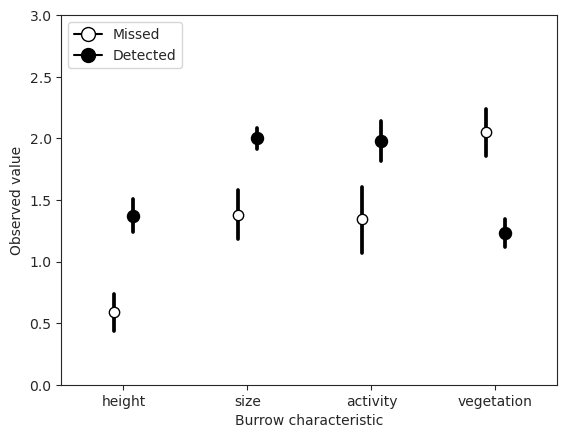

In [51]:
plt.close()
from matplotlib.lines import Line2D
sns.set_style("ticks")
gdf_pdog_points_long = pd.melt(gdf_pdog_points[gdf_pdog_points['is_burrow'] == 1],
                               id_vars=['Pasture', 'is_burrow', 'pred', 'label'],
                               value_vars=['height', 'size', 'activity', 'vegetation'])
g=sns. pointplot(x='variable', y='value', data=gdf_pdog_points_long, kind='point',
            hue='pred', join=False, dodge=0.15, markers='o', scale=1.1, palette={0.0: 'black', 1.0: 'black'}, ec=['black', 'none'])
#g.set_facecolor('blue')
g.set_ylim(0, 3)
g.legend().remove()
p1=g.get_children()[4]
p1.set_facecolor('white')
p1.set_linewidth(1)
g.set_xlabel('Burrow characteristic')
g.set_ylabel('Observed value')

legend_elements = [Line2D([0], [0], marker='o', color='black', label='Missed',
                          markerfacecolor='white', markersize=10),
                  Line2D([0], [0], marker='o', color='black', label='Detected',
                          markerfacecolor='black', markersize=10)]

g.legend(handles=legend_elements, loc='upper left')
plt.show(g)

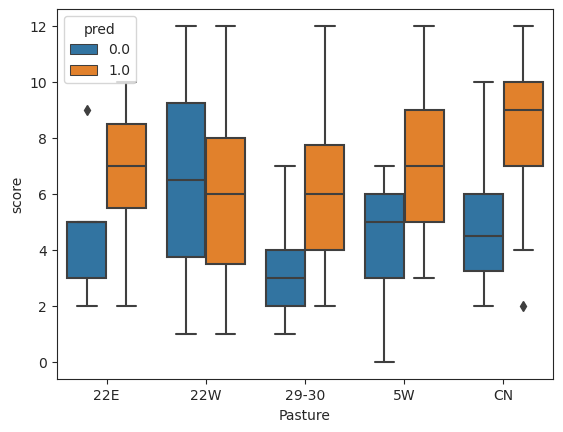

In [52]:
gdf_pdog_points['score'] = gdf_pdog_points.apply(lambda x: x['height'] + x['size'] + x['activity'] + (3.0 - x['vegetation']), axis=1)
sns.boxplot(x='Pasture', y='score', data=gdf_pdog_points[gdf_pdog_points['is_burrow'] == 1],
            hue='pred')
plt.show()

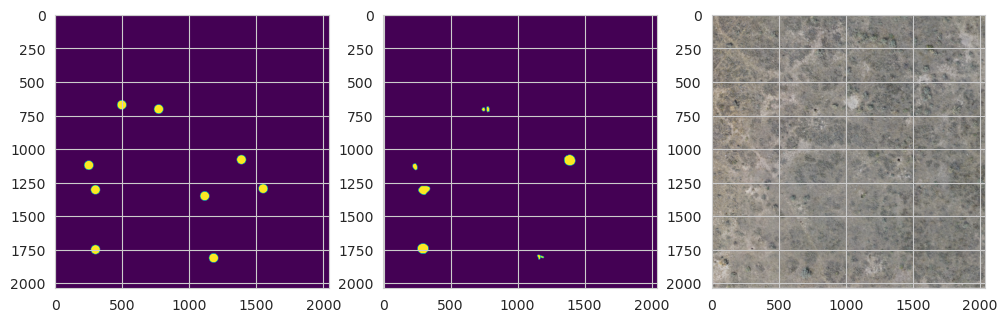

In [83]:
plt.close()
fig, axs = plt.subplots(figsize=(12, 6), nrows=1, ncols=3)
axs[0].imshow(all_points_mask, cmap='viridis')
axs[1].imshow(pr_mask, cmap='viridis')
axs[2].imshow(rgb_out.transpose((1, 2, 0)))
plt.show()

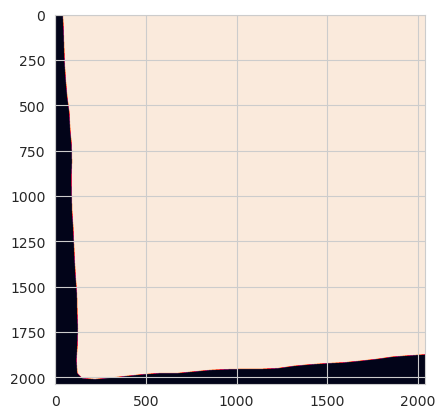

In [84]:
plt.imshow(gt_plot_mask)
plt.show()

In [59]:
pred_precision = np.sum(ground_pred_precision_list) / len(ground_pred_precision_list)
label_precision = np.sum(ground_label_precision_list) / len(ground_label_precision_list)
#recall = np.sum(recall_list) / len(recall_list)
#fscore = (2 * precision * recall) / (precision + recall)
pred_corr = np.corrcoef(ground_burrow_ct_gt, ground_burrow_ct_pred)[0, 1]
label_corr = np.corrcoef(ground_burrow_ct_gt, ground_burrow_ct_label)[0, 1]

In [61]:
print('--- Results for ' + str(len(ground_tile_id_list)) + ' test tiles (excluding predicted burrows < 0.05 m^2) ---')
print('Prediction precision: ' + str(round(pred_precision, 2)))
#print('recall: ' + str(round(recall, 2)))
#print('f-score: ' + str(round(fscore, 2)))
print('Prediciton burrow count correlation: ' + str(round(pred_corr, 2)))

print('Label precision: ' + str(round(label_precision, 2)))
print('Label burrow count correlation: ' + str(round(label_corr, 2)))

--- Results for 75 test tiles (excluding predicted burrows < 0.05 m^2) ---
Prediction precision: 0.36
Prediciton burrow count correlation: 0.59
Label precision: 0.39
Label burrow count correlation: 0.31


In [152]:
gdf_pdog_points_test = gdf_pdog_points[~gdf_pdog_points['pred'].isnull()].copy()
gdf_pdog_points_test['score'] = gdf_pdog_points_test.apply(lambda x: x['height'] + x['size'] + x['activity'] + (3.0 - x['vegetation']), axis=1)

In [153]:
gpred_recall = ((gdf_pdog_points_test['is_burrow'] == 1) & 
                   (gdf_pdog_points_test['pred'] == 1)).sum() / (gdf_pdog_points_test['is_burrow'] == 1).sum()
glabel_recall = ((gdf_pdog_points_test['is_burrow'] == 1) & 
                   (gdf_pdog_points_test['label'] == 1)).sum() / (gdf_pdog_points_test['is_burrow'] == 1).sum()
#fscore = (2 * precision * recall) / (precision + recall)

In [162]:
gpred_recall

0.6629213483146067

In [155]:
gdf_pdog_points_test[(gdf_pdog_points_test['is_burrow'] == 1) & 
                   (gdf_pdog_points_test['pred'] == 0)]['score'].mean()

4.666666666666667

In [156]:
gdf_pdog_points_test['score'].mean()

6.168539325842697

In [161]:
gdf_pdog_points_test[gdf_pdog_points_test['is_burrow'] == 1]

,Comment,Pasture,height,size,activity,vegetation,is_burrow,geometry,pred,label,score
0,h0s1a2v2,22E,0.0,1.0,2.0,2.0,1,POINT Z (520461.553 4518295.570 1620.810),0.0,1.0,4.0
1,h2s1a3v1,22E,2.0,1.0,3.0,1.0,1,POINT Z (520452.430 4518297.281 1620.839),1.0,1.0,8.0
2,h0s0a1v2,22E,0.0,0.0,1.0,2.0,1,POINT Z (520450.601 4518299.095 1620.966),1.0,1.0,2.0
3,h1s1a2v2,22E,1.0,1.0,2.0,2.0,1,POINT Z (520443.890 4518293.633 1619.823),1.0,0.0,5.0
4,h1s1a2v3,22E,1.0,1.0,2.0,3.0,1,POINT Z (520435.802 4518297.874 1620.709),0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
357,h1s2a0v1,5W,1.0,2.0,0.0,1.0,1,POINT Z (525653.756 4523436.086 1627.086),1.0,0.0,5.0
358,h0s2a0v2,5W,0.0,2.0,0.0,2.0,1,POINT Z (525659.512 4523419.659 1626.964),1.0,0.0,3.0
359,h0s0a0v3,5W,0.0,0.0,0.0,3.0,1,POINT Z (525659.916 4523420.353 1626.968),0.0,0.0,0.0
361,h0s2a0v1,5W,0.0,2.0,0.0,1.0,1,POINT Z (525656.319 4523393.642 1626.979),1.0,0.0,4.0


In [54]:
ID = '5W_20'
print(ID)
# get the path base to the imagery associated with the training tile
if external_path is None:
    tilePATH = df_bboxes_all[df_bboxes_all['ID'] == ID]['path_pre'].iloc[0]
else:
    tilePATH = os.path.join(external_path,
                            df_bboxes_all[df_bboxes_all['ID'] == ID]['path_pre'].iloc[0])
# get the x/y coordinates of the bounding box for the training polygon within the tile
box_coords_x = df_bboxes_all[df_bboxes_all['ID'] == ID][['min_x', 'max_x']].iloc[0].values
box_coords_y = df_bboxes_all[df_bboxes_all['ID'] == ID][['min_y', 'max_y']].iloc[0].values
# get the box coordinate pairs
ll, ul, lr, ur = list(itertools.product(box_coords_x, box_coords_y))
# create a polygon from the coordinate pairs
tile_geom = Polygon([ll, ul, ur, lr])
# create the full path to the RGB image of the training tile
rgb_path = tilePATH + 'rgb.tif'
with rio.open(rgb_path) as src_rgb:   
    profile_rgb = src_rgb.meta
    rgb_out, transform_out = mask.mask(src_rgb,
                                       [tile_geom],
                                       crop=True)
    rgb_out = rgb_out.astype('int')
    #rgb_out = rgb_out[:, -win_size:, :win_size]
    #show(rgb_out)
    ll_i = src_rgb.index(*ll)
    ur_i = src_rgb.index(*ur)
    gdf_polys_sub = gdf_polys[gdf_polys['Tile'] == ID]
    if len(gdf_polys_sub) > 0:
        label_mask = rasterize(gdf_polys_sub.geometry, 
                          out_shape=rgb_out.shape[1:], transform=transform_out,
                          default_value=1)
    else:
         label_mask = np.zeros_like(rgb_out[0, :, :])   
    #label = label[ll_i[0]:ur_i[0], ll_i[1]:ur_i[1]]
    profile_rgb.update({'dtype': 'int16',
                        'width': rgb_out.shape[0],
                        'height': rgb_out.shape[1],
                        'transform': transform_out})
    profile_single = profile_rgb.copy()
    profile_single.update({'count': 1})
    profile_single_float = profile_single.copy()
    profile_single_float.update({'dtype': 'float64'})
    #show(label)

n_row_chunks = int(np.ceil(rgb_out.shape[1]/256))
n_col_chunks = int(np.ceil(rgb_out.shape[2]/256))

pr_mask = np.empty_like(rgb_out[0, :, :])
pr_mask = np.empty_like(rgb_out[0, :, :])
image_dict = {}
for suffix in inputs_fnl:
    with rio.open(re.sub('rgb', suffix, rgb_path)) as src_i:
        i_out = src_i.read(out_shape=(
            src_i.count,
            src_rgb.meta['height'],
            src_rgb.meta['width']),
                           resampling=Resampling.bilinear)
        image_dict[suffix] = i_out[:, ll_i[1]:ur_i[1]+1, ur_i[0]:ll_i[0]+1]
if 'rgb' in inputs_fnl:
    image_dict['rgb'] = rgb_out
if preprocess:
    for i in image_dict:
        image_dict[i] = normalize_fn(image_dict[i], i, image_stats)
image_list = [image_dict[i].astype('float32') for i in inputs_fnl]
image_out = np.concatenate(image_list, axis=0)

chunksize = 256
pr_mask = np.empty_like(rgb_out[0, :, :])
n_row_chunks = int(np.ceil(rgb_out.shape[1]/chunksize))
n_col_chunks = int(np.ceil(rgb_out.shape[2]/chunksize))
image_sub_dict = {}
for r in range(n_row_chunks):
    if (r + 1) * chunksize > rgb_out.shape[1]:
        r_min = rgb_out.shape[1] - chunksize
        r_max = rgb_out.shape[1]
    else:
        r_min = r * chunksize
        r_max = (r + 1) * chunksize
    for c in range(n_col_chunks):
        if (c + 1) * chunksize > rgb_out.shape[2]:
            c_min = rgb_out.shape[2] - chunksize
            c_max = rgb_out.shape[2]
        else:
            c_min = c * chunksize
            c_max = (c + 1) * chunksize
        image_out_sub = image_out[:, r_min:r_max, c_min:c_max]
        x_tensor = torch.from_numpy(image_out_sub).to(DEVICE).unsqueeze(0)
        if type(best_model) == nn.DataParallel:
            pr_mask[r_min:r_max, c_min:c_max] = best_model.module.predict(x_tensor).cpu().detach().numpy().squeeze() > 0.5
        else:
            pr_mask[r_min:r_max, c_min:c_max] = best_model.predict(x_tensor).cpu().detach().numpy().squeeze() > 0.5

# create mask of ground-truth polygon
gt_plot_mask = rasterize(gdf_plots_all.geometry, 
                         out_shape=rgb_out.shape[1:], transform=transform_out,
                         default_value=1)

# get predictions for ground-truth points
gdf_pdog_points_sub = gdf_pdog_points[gdf_pdog_points.geometry.within(tile_geom)]
if len(gdf_pdog_points_sub) > 0:
    all_points_mask = rasterize(gdf_pdog_points_sub.geometry.buffer(0.5), 
                                  out_shape=rgb_out.shape[1:], transform=transform_out,
                                  default_value=1)      
else:
    all_points_mask = np.zeros_like(rgb_out[0, :, :]) 

# mask all arrays to ground-truth polygon
pr_mask = pr_mask * gt_plot_mask
label_mask = label_mask * gt_plot_mask
all_points_mask = all_points_mask * gt_plot_mask


# get regions and properties of the ground truth and predictions
label_labels = label(label_mask)
label_regions = regionprops(label_labels)
pr_labels = label(pr_mask)
pr_regions = regionprops(pr_labels)

ground_pred_precision_list = []
ground_label_precision_list = []
r_ct_pred = 0
for r in pr_regions:
    if r.area*src_rgb.meta['transform'][0]**2 > 0.05:
        y_pr, x_pr = r.centroid
        ground_pred_precision_list.append(all_points_mask[int(y_pr), int(x_pr)])
        r_ct_pred += 1

r_ct_label = 0
for r in label_regions:
    y_label, x_label = r.centroid
    ground_label_precision_list.append(all_points_mask[int(y_label), int(x_label)])
    r_ct_label += 1

5W_20


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 1829 and the array at index 1 has size 1831

In [ ]:
plt.close()
fig, axs = plt.subplots(figsize=(12, 6), nrows=1, ncols=4)
axs[0].imshow(all_points_mask, cmap='viridis')
axs[1].imshow(pr_mask, cmap='viridis')
axs[2].imshow(label_mask, cmap='viridis')
axs[3].imshow(rgb_out.transpose((1, 2, 0)))
plt.show()

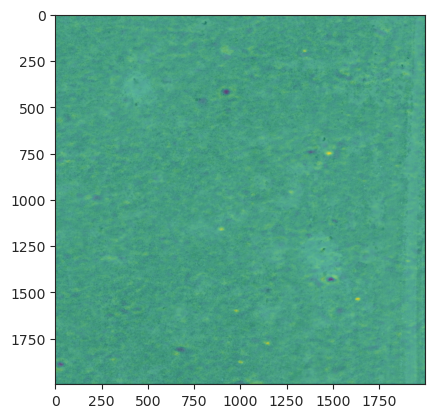

In [244]:
plt.imshow(image_dict['rgb'].transpose((1, 2, 0)))
plt.imshow(image_dict['tpi'].squeeze(), cmap='viridis', alpha=0.7)
plt.show()

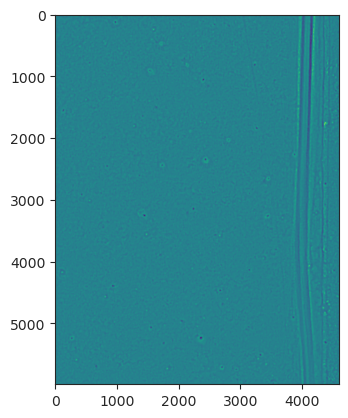

In [250]:
with rio.open(re.sub('rgb', 'tpi', rgb_path)) as src_i:
    i_out = src_i.read(out_shape=(
        src_i.count,
        src_rgb.meta['height'],
        src_rgb.meta['width']),
                       resampling=Resampling.bilinear)
plt.imshow(i_out.squeeze(), cmap='viridis')
plt.show()

In [249]:
i_out.shape

(1, 4591, 5989)

In [245]:
src_rgb.meta

{'driver': 'GTiff',
 'dtype': 'float64',
 'nodata': None,
 'width': 4591,
 'height': 5989,
 'count': 3,
 'crs': CRS.from_epsg(32613),
 'transform': Affine(0.015027257370912674, 0.0, 519939.0045268533,
        0.0, -0.015027257370897528, 4518839.99594921)}

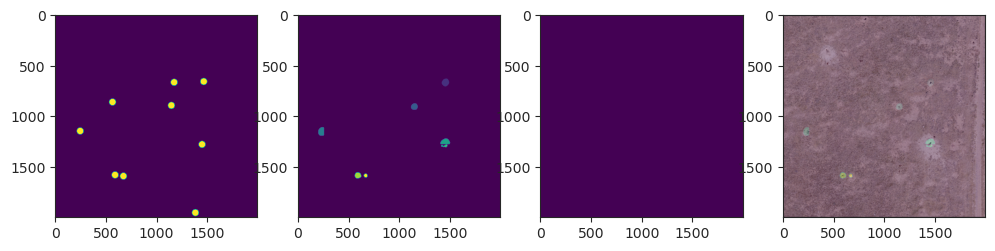

In [253]:
fig, axs = plt.subplots(figsize=(12, 6), nrows=1, ncols=4)
axs[0].imshow(all_points_mask, cmap='viridis')
axs[1].imshow(pr_labels, cmap='viridis')
axs[2].imshow(label_mask, cmap='viridis')
axs[3].imshow(rgb_out.transpose((1, 2, 0)))
axs[3].imshow(pr_labels, cmap='viridis', alpha=0.3)
plt.show()

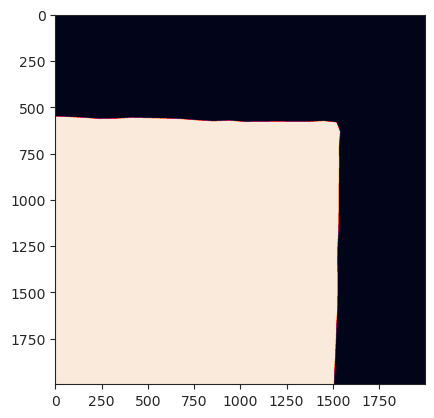

In [220]:
plt.imshow(gt_plot_mask)
plt.show()

In [ ]:
#if not os.path.exists('./cnn_results_' + model_fnl + '/test_predictions' + '_'.join(inputs_fnl)):
#    os.mkdir('./cnn_results_' + model_fnl + '/test_predictions' + '_'.join(inputs_fnl))
for i in range(10):
    n = np.random.choice(len(test_dataset))
    #n = i
    get_vis = test_dataset_vis[n]
    image_vis = test_dataset_vis.image_dict['rgb'].astype('uint8')
    image, gt_mask = test_dataset[n]
    
    gt_mask = gt_mask.squeeze()
    
    x_tensor = torch.from_numpy(image).to(DEVICE).unsqueeze(0)
    pr_mask = best_model.predict(x_tensor)
    pr_mask = (pr_mask.squeeze().cpu().numpy().round())
        
    visualize(show=True,
                  write=False,
                  path='./cnn_results/test_predictions/' + 'pred_' + test_dataset_vis.ids[n] + '.png',
                  image=image_vis, 
                  ground_truth_mask=gt_mask, 
                  predicted_mask=pr_mask.squeeze()
            )

CN_50


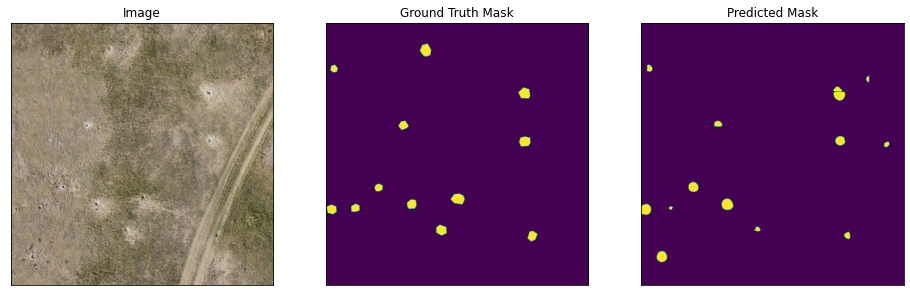

In [123]:
precision_list_sub = []
recall_list_sub = []
ID = 'CN_50'
if not all(df_tiles[df_tiles['ID'] == ID]['Train'] == 1):
    gdf_polys_sub = gdf_polys[gdf_polys['Tile'] == ID]
    print(ID)
    # get the path base to the imagery associated with the training tile
    tilePATH = df_tiles[df_tiles['ID'] == ID]['path_pre'].iloc[0]
    # get the x/y coordinates of the bounding box for the training polygon within the tile
    box_coords_x = df_tiles[df_tiles['ID'] == ID][['min_x', 'max_x']].iloc[0].values
    box_coords_y = df_tiles[df_tiles['ID'] == ID][['min_y', 'max_y']].iloc[0].values
    # get the box coordinate pairs
    ll, ul, lr, ur = list(itertools.product(box_coords_x, box_coords_y))
    # create a polygon from the coordinate pairs
    tile_geom = Polygon([ll, ul, ur, lr])
    # create the full path to the RGB image of the training tile
    rgb_path = tilePATH + 'rgb.tif'
    with rio.open(rgb_path) as src_rgb:   
        profile_rgb = src_rgb.meta
        rgb_out, transform_out = mask.mask(src_rgb,
                                           [tile_geom],
                                           crop=True)
        rgb_out = rgb_out.astype('int')
        #rgb_out = rgb_out[:, -win_size:, :win_size]
        #show(rgb_out)
        ll_i = src_rgb.index(*ll)
        ur_i = src_rgb.index(*ur)

        label_mask = rasterize(gdf_polys_sub.geometry, 
                          out_shape=rgb_out.shape[1:], transform=transform_out,
                          default_value=1)
        #label = label[ll_i[0]:ur_i[0], ll_i[1]:ur_i[1]]
        profile_rgb.update({'dtype': 'int16',
                            'width': rgb_out.shape[0],
                            'height': rgb_out.shape[1],
                            'transform': transform_out})
        profile_single = profile_rgb.copy()
        profile_single.update({'count': 1})
        profile_single_float = profile_single.copy()
        profile_single_float.update({'dtype': 'float64'})
        #show(label)

    n_row_chunks = int(np.ceil(rgb_out.shape[1]/256))
    n_col_chunks = int(np.ceil(rgb_out.shape[2]/256))

    pr_mask = np.zeros_like(rgb_out[0, :, :])
    image_dict = {}
    for suffix in inputs_fnl:
        with rio.open(re.sub('rgb', suffix, rgb_path)) as src_i:
            i_out = src_i.read(out_shape=(
                src_i.count,
                src_rgb.meta['width'],
                src_rgb.meta['height']),
                               resampling=Resampling.bilinear)
            image_dict[suffix] = i_out[:, ll_i[1]-1:ur_i[1]+1, ur_i[0]-1:ll_i[0]+1]
    image_sub_dict = {}
    for r in range(n_row_chunks):
        if (r + 1) * 256 > rgb_out.shape[1]:
            r_min = rgb_out.shape[1] - 256
            r_max = rgb_out.shape[1]
        else:
            r_min = r * 256
            r_max = (r + 1) * 256
        for c in range(n_col_chunks):
            if (c + 1) * 256 > rgb_out.shape[2]:
                c_min = rgb_out.shape[2] - 256
                c_max = rgb_out.shape[2]
            else:
                c_min = c * 256
                c_max = (c + 1) * 256
            for k in image_dict:
                image_sub_dict[k] = image_dict[k][:, r_min:r_max, c_min:c_max].astype('float32')
            if 'rgb' in inputs_fnl:
                image_sub_dict['rgb'] = rgb_out[:, r_min:r_max, c_min:c_max].astype('float32')
            image_list = [image_sub_dict[i] for i in inputs_fnl]
            image_out = np.concatenate(image_list, axis=0)
            x_tensor = torch.from_numpy(image_out).to(DEVICE).unsqueeze(0)
            pr_mask[r_min:r_max, c_min:c_max] = best_model.predict(x_tensor).cpu().detach().numpy().squeeze() > 0.5
            #if True:
            #    break
        #if True:
        #    break
        #    print('done')

    # get regions and properties of the ground truth and predictions
    label_labels = label(label_mask)
    label_regions = regionprops(label_labels)
    pr_labels = label(pr_mask)
    pr_regions = regionprops(pr_labels)
    
    for r in pr_regions:
        if r.area*src_rgb.meta['transform'][0]**2 > 0.01:
            y_pr, x_pr = r.centroid
            precision_list_sub.append(label_mask[int(y_pr), int(x_pr)])

    for r in label_regions:
        y_label, x_label = r.centroid
        recall_list_sub.append(pr_mask[int(y_label), int(x_label)])  
    
    
    visualize(show=True,
              write=False,
              image=rgb_out.transpose((1, 2, 0)), 
              ground_truth_mask=label_mask.squeeze(), 
              predicted_mask=pr_mask.squeeze()
        )

In [124]:
precision_sub = np.sum(precision_list_sub) / len(precision_list_sub)
recall_sub = np.sum(recall_list_sub) / len(recall_list_sub)
fscore_sub = (2 * precision_sub * recall_sub) / (precision_sub + recall_sub)

In [125]:
print('precision: ' + str(round(precision_sub, 2)))
print('recall: ' + str(round(recall_sub, 2)))
print('f-score: ' + str(round(fscore_sub, 2)))

precision: 0.79
recall: 0.83
f-score: 0.81


In [99]:
for r in label_regions:
    print(r.centroid)

(208.0, 245.1888775361261)
(408.4257377842284, 1367.9305757135946)
(924.8004747277297, 1506.991622451829)
(1306.0253290290539, 210.1131114973926)


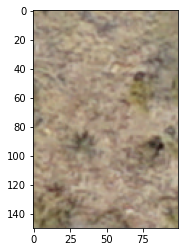

In [106]:
plt.imshow(rgb_out[:, 1200:1350, 150:250].transpose(1, 2, 0))

In [110]:
image_dict['shade'].shape

(1, 2039, 2039)

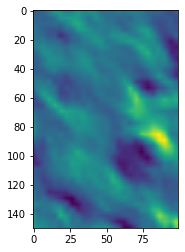

In [112]:
plt.imshow(image_dict['shade'][:, 1200:1350, 150:250].squeeze())

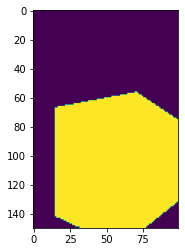

In [107]:
plt.imshow(label_mask[1200:1350, 150:250])

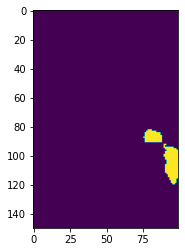

In [103]:
plt.imshow(pr_mask[1200:1350, 150:250])

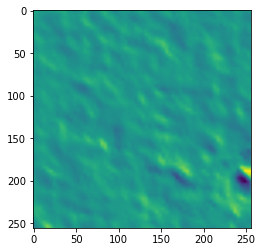

In [64]:
plt.imshow(image_out[3, :, :])

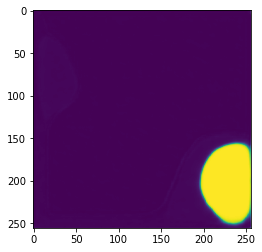

In [81]:
plt.imshow(best_model.predict(x_tensor).cpu().detach().numpy().squeeze())

In [85]:
pr_mask[r_min:r_max, c_min:c_max].dtype# = best_model.predict(x_tensor).cpu().detach().numpy().squeeze()

dtype('int64')

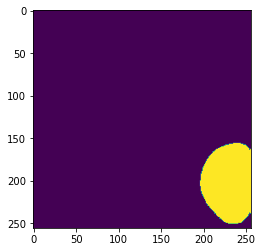

In [88]:
plt.imshow(pr_mask[r_min:r_max, c_min:c_max] > 0.5)

In [81]:


label_labels = label(label_mask)
label_regions = regionprops(label_labels)

pr_labels = label(pr_mask)
pr_regions = regionprops(pr_labels)

In [86]:
precision_list = []
for r in pr_regions:
    if r.area*src_rgb.meta['transform'][0]**2 > 0.01:
        y_pr, x_pr = r.centroid
        precision_list.append(label_mask[int(y_pr), int(x_pr)])

recall_list = []
for r in label_regions:
    y_label, x_label = r.centroid
    recall_list.append(pr_mask[int(y_label), int(x_label)])        

In [87]:
precision_list

[1, 1, 1]

In [88]:
recall_list

[1, 0, 1, 0]

In [74]:
src_rgb.meta['transform'][0]**2

0.0002166579681103332

In [ ]:
ID = 'CN_6'
gdf_polys_sub = gdf_polys[gdf_polys['Tile'] == ID]
print(ID)
# get the path base to the imagery associated with the training tile
tilePATH = df_tiles[df_tiles['ID'] == ID]['path_pre'].iloc[0]
# get the x/y coordinates of the bounding box for the training polygon within the tile
box_coords_x = df_tiles[df_tiles['ID'] == ID][['min_x', 'max_x']].iloc[0].values
box_coords_y = df_tiles[df_tiles['ID'] == ID][['min_y', 'max_y']].iloc[0].values
# get the box coordinate pairs
ll, ul, lr, ur = list(itertools.product(box_coords_x, box_coords_y))
# create a polygon from the coordinate pairs
tile_geom = Polygon([ll, ul, ur, lr])
# create the full path to the RGB image of the training tile
rgb_path = tilePATH + 'rgb.tif'
with rio.open(rgb_path) as src_rgb:   
    profile_rgb = src_rgb.meta
    rgb_out, transform_out = mask.mask(src_rgb,
                                       [tile_geom],
                                       crop=True)
    rgb_out = rgb_out.astype('int')
    #rgb_out = rgb_out[:, -win_size:, :win_size]
    show(rgb_out)
    ll_i = src_rgb.index(*ll)
    ur_i = src_rgb.index(*ur)

    label = rasterize(gdf_polys_sub.geometry, 
                      out_shape=rgb_out.shape[1:], transform=transform_out,
                      default_value=1)
    #label = label[ll_i[0]:ur_i[0], ll_i[1]:ur_i[1]]
    profile_rgb.update({'dtype': 'int16',
                        'width': rgb_out.shape[0],
                        'height': rgb_out.shape[1],
                        'transform': transform_out})
    profile_single = profile_rgb.copy()
    profile_single.update({'count': 1})
    profile_single_float = profile_single.copy()
    profile_single_float.update({'dtype': 'float64'})
    show(label)

n_row_chunks = int(np.ceil(rgb_out.shape[1]/256))
n_col_chunks = int(np.ceil(rgb_out.shape[2]/256))

pr_mask = np.empty_like(rgb_out[0, :, :])
for r in range(n_row_chunks):
    if (r + 1) * 256 > rgb_out.shape[1]:
        r_min = rgb_out.shape[1] - 256
        r_max = rgb_out.shape[1]
    else:
        r_min = r * 256
        r_max = (r + 1) * 256
    for c in range(n_col_chunks):
        if (c + 1) * 256 > rgb_out.shape[2]:
            c_min = rgb_out.shape[2] - 256
            c_max = rgb_out.shape[2]
        else:
            c_min = c * 256
            c_max = (c + 1) * 256
        rgb_sub = rgb_out[:, r_min:r_max, c_min:c_max]
        rgb_image_sub = preprocessing_fn(rgb_sub.transpose((1, 2, 0))).astype('float32').transpose((2, 0, 1))
        x_tensor = torch.from_numpy(rgb_image_sub).to(DEVICE).unsqueeze(0)
        pr_mask[r_min:r_max, c_min:c_max] = best_model.predict(x_tensor).cpu().squeeze()

visualize(
        image=rgb_out.transpose((1, 2, 0)), 
        ground_truth_mask=label.squeeze(), 
        predicted_mask=pr_mask.squeeze()
    )

In [44]:
os.path.basename(f).split('_'ascending=-1]

['rgb', 'tpi', 'shade', 'ndvi', 'dsm']

In [38]:
|

SyntaxError: invalid syntax (525519296.py, line 1)